# Week 6: Runge-Kutta

## Place Library Imports Here

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Basic Midpoint RK and RK4

### Midpoint RK

<font color = blue>
    
Construct a function that implements the midpoint RK method to solve the first order differential equation

$$
\frac{dx}{dt} = F(x, t)
$$

It should take as inputs the `function` $F$ (assumed to be of two variables), the initial value `x_initial`, the `step_size`, and the total `step_count` $= N$.  It should output two lists: a list of times $\{t_n\}$ and a list of positions $\{x_n\}$, each with $N+1$ elements (starting from $0$ and `x_initial` respectively.)

In [217]:
def midpoint_rk(function, x_initial, step_size, step_count):
    """
    implementation of the midpoint RK method to solve first order differential

    function : force function of two variables
    x_initial : the initial value x_o
    step_size : the time steps we are taking del_t
    step_count : total number of steps we are taking

    returns : two lists, one of the times and one of the x position of length N + 1
    """
    x_n = x_initial
    t_n = 0
    t_vals = np.linspace(0, step_size * step_count, step_count + 1)
    if isinstance(x_initial, (int, float)):
        x_vals = np.zeros(step_count + 1)  # For scalar x_initial, use a 1D array
    else:
        x_vals = np.zeros((step_count + 1, len(x_initial)))
    for i in range(step_count):
        k_1 = function(x_n, t_vals[i]) * step_size
        k_2 = function((x_n + (k_1/2)), (t_vals[i] + (step_size/2))) * step_size
        x_n = x_n + k_2
        x_vals[i + 1] = x_n
    return t_vals, x_vals

In [ ]:
def euler(function, x_initial, time_step, step_count):
    '''takes as input a function defining dx/dt for a first order
    differential equation (assumed to depend on x and t).  Also takes the
    initial value of x, the time step, and the number of steps to take.
    Returns lists of times and positions approximating the solution
    using the Euler method.'''
    x = x_initial 
    t = 0
    time_list = np.linspace(0, time_step * step_count, step_count + 1)
    position_list = np.array([x_initial for t in time_list])
    # the position_list data types will be whatever data type x_initial is
    for i in range(step_count): 
        x = x + (time_step * function(x, t))
        # this is the Euler iteration rule
        t = t + time_step
        position_list[i+1] = x 
    return [time_list, position_list]

### 
RK4

<font color = blue>
    
Now construct a function to solve the same type of problem, with the same inputs and outputs, but using the Runge-Kutta-4 algorithm.

In [213]:
def rk4(function, x_initial, step_size, step_count):
    """
    implementation of the midpoint RK method to solve first order differential

    function : force function of two variables
    x_initial : the initial value x_o
    step_size : the time steps we are taking del_t
    step_count : total number of steps we are taking

    returns : two lists, one of the times and one of the x position of length N + 1
    """
    x_n = x_initial
    t_n = 0
    t_vals = np.linspace(0, step_size * step_count, step_count + 1)
    if isinstance(x_initial, (int, float)):
        x_vals = np.zeros(step_count + 1)  # For scalar x_initial, use a 1D array
    else:
        x_vals = np.zeros((step_count + 1, len(x_initial)))
    for i in range(step_count):
        k_1 = function(x_n, t_n) * step_size
        k_2 = function(x_n + (k_1/2), t_n + (step_size/2)) * step_size
        k_3 = function(x_n + (k_2/2), t_n + (step_size/2)) * step_size
        k_4 = function(x_n + k_3, t_n + (step_size)) * step_size
        x_n = x_n + (k_1/6) + (k_2/3) + (k_3/3) + (k_4/6)
        t_n += step_size
        t_vals[i + 1] = t_n
        x_vals[i + 1] = x_n
    return t_vals, x_vals

### 

Differential Equations: Analytic Discussion

<font color = blue>
This isn't a computational problem, but prepatory work to establish exact solutions to a set of three differential equations (to compare with numerical work).  What should appear in the notebook is the worked out solution (that is, do it by hand and show your work here.)

#### Part a)

<font color = blue>
$$
\frac{dx}{dt} = t^{10} - 5t^2, \hspace{.75in} x(0) = 1
$$

$$\int \frac{dx}{dt} dt = \int (t^{10} - 5t^2) dt$$
$$x = \frac{t^{11}}{11} - \frac{5t^3}{3} + C$$
$$1 = \frac{0^{11}}{11} - \frac{5(0^3)}{3} + C$$
$$1 = C$$
$$x(t) = \frac{t^{11}}{11} - \frac{5t^3}{3} + 1$$

#### Part b)

<font color = blue>
$$
\frac{dx}{dt} = -tx, \hspace{.75in} x(0) = 1
$$

$$\frac{1}{x} dx = -t dt$$
$$\ln(x) = -\frac{t^2}{2} + C$$
$$x = e^{-\frac{t^2}{2} + C} = e^C \cdot e^{-\frac{t^2}{2}}$$
$$1 = e^C \cdot e^{-\frac{0^2}{2}} = e^C \cdot 1$$
$$C = 0$$
$$x(t) = e^{-\frac{t^2}{2}}$$

#### Part c)

<font color = blue>
    
$$
\frac{d^2x}{dt^2} = -29x - 4\frac{dx}{dt}, \hspace{.75in} x(0) = 1, \hspace{.75in} \dot{x}(0) = 0
$$

$$\frac{d^2x}{dt^2} + 4\frac{dx}{dt} + 29x = 0$$
$$r^2 + 4r + 29 = 0$$
Using quadratic formula we get:
$$r = -2 \pm 5i$$
$$x(t) = e^{-2t}(C_1cos(5t) + C_2sin(5t))$$
$$x(0) = C_1 = 1$$
$$x'(t) = -2e^{-2t}(C_1cos(5t) + C_2sin(5t)) + e^{-2t}(5C_1cos(5t) - 5C_2sin(5t))$$
$$x'(0) = 0 = -2C_1 + 5C_2 = -2 + 5C_2$$
$$\frac{2}{5} = C_2$$
$$x(t) = e^{-2t}(cos(5t) + (\frac{2}{5})sin(5t))$$

### Testing the RK Functions

<font color = blue>
    
Use both the midpoint and RK4 algorithms to solve each of the differential equations above, in the region $t \in [0, 1]$, with a step size of $0.001$.  In each case, calulate (and plot) the *residuals* with respect to the exact result.  Identify features of these graphs and **discuss** them.  For added insight, look at these graphs with a variety of "plot range" choices.

#### Part a)

<function matplotlib.pyplot.show(close=None, block=None)>

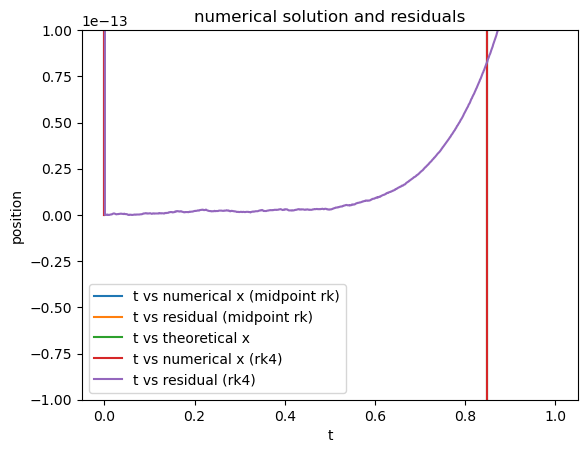

In [286]:
def part_a(x, t):
    """
    first order differential equation from part a
    x : position
    t : time
    """
    return (t**10) - (5 * t**2)

t_vals, x_vals_midpoint_a = midpoint_rk(part_a, 1, .001, 1000)
t_vals, x_vals_rk4_a = rk4(part_a, 1, .001, 1000)

residuals_midpoint_a = np.zeros(1001)
residuals_rk4_a = np.zeros(1001)
theoretical_x_a = np.zeros(1001)

for i in range(1001):
    theoretical_x_a[i] = (t_vals[i]**11/11) - (5 * t_vals[i]**3/3) + 1
    residuals_midpoint_a[i] = abs(theoretical_x_a[i] - x_vals_midpoint_a[i])
    residuals_rk4_a[i] = abs(theoretical_x_a[i] - x_vals_rk4_a[i])

plt.plot(t_vals, x_vals_midpoint_a, label = "t vs numerical x (midpoint rk)")
plt.plot(t_vals, residuals_a, label = "t vs residual (midpoint rk)")
plt.plot(t_vals, theoretical_x_a, label = "t vs theoretical x")
plt.plot(t_vals, x_vals_rk4_a, label = "t vs numerical x (rk4)")
plt.plot(t_vals, residuals_rk4_a, label = "t vs residual (rk4)")
plt.legend()
plt.title("numerical solution and residuals")
plt.ylim(-10**-13, 10**-13)
plt.xlabel("t")
plt.ylabel("position")
plt.show

Firstly, in this figure we can see that other than t = 0 (where computers usually struggle), the two methods are in agreement within reasonable uncertainty of the theoretical solution. Another interesting feature of the graph that is apparent with the correct y limits is that the midpoint rk method is consistently out performed by the RK4 method. In this case we can see that the residual of the midpoint rk method gets greater and greater until the position value as a function of time crosses 0. The residual of the RK4 method is much more accurate with errors <<1% of the error of the midpoint rk function. In this case, the error looks like it scales with t^2 as it grows roughly exponentially as t increases.

#### Part b)

<function matplotlib.pyplot.show(close=None, block=None)>

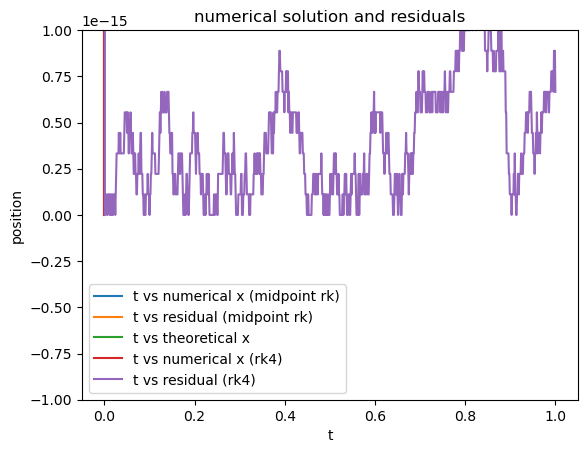

In [295]:
def part_b(x, t):
    """
    first order differential equation from part b
    x : position
    t : time
    """
    return -t * x

t_vals, x_vals_midpoint_b = midpoint_rk(part_b, 1, .001, 1000)
t_vals, x_vals_rk4_b = rk4(part_b, 1, .001, 1000)

residuals_midpoint_b = np.zeros(1001)
residuals_rk4_b = np.zeros(1001)
theoretical_x_b = np.zeros(1001)

for i in range(1001):
    theoretical_x_b[i] = np.exp(-(t_vals[i]**2/2))
    residuals_midpoint_b[i] = abs(theoretical_x_b[i] - x_vals_midpoint_b[i])
    residuals_rk4_b[i] = abs(theoretical_x_b[i] - x_vals_rk4_b[i])

plt.plot(t_vals, x_vals_midpoint_b, label = "t vs numerical x (midpoint rk)")
plt.plot(t_vals, residuals_midpoint_b, label = "t vs residual (midpoint rk)")
plt.plot(t_vals, theoretical_x_b, label = "t vs theoretical x")
plt.plot(t_vals, x_vals_rk4_b, label = "t vs numerical x (rk4)")
plt.plot(t_vals, residuals_rk4_b, label = "t vs residual (rk4)")
plt.legend()
plt.title("numerical solution and residuals")
plt.ylim(-10**-15, 10**-15)
plt.xlabel("t")
plt.ylabel("position")
plt.show

In this figure, again we can see that both of the numerical methods approximate the analytical solution within reasonable uncertainty. In this figure (similar to part a) we can again see that the residuals for the rk4 method or <<1% of the residuals for the midpoint method. This time however the midpoint error seems to grow exponentially, and the rk4 residuals are not growing (that I can see) in any meaningful way. Its also important to note that the rk4 residuals are very roughly scattered and dont seem to follow any simple equation.

#### Part c)

<function matplotlib.pyplot.show(close=None, block=None)>

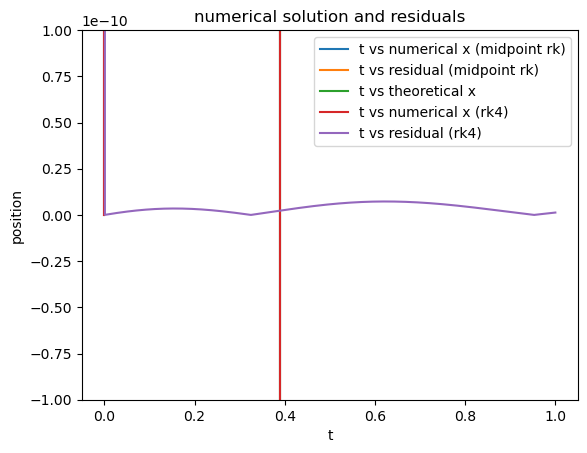

In [306]:
step_count = 1000
initial_values = np.array([1, 0])

def part_c(f, t):
    """
    second order differential equation from part c
    f : two item array [x', x]
    t : time
    """
    return np.array([f[1], (-29 * f[0]) - 4 * f[1]])

t_vals, x_vals_midpoint_c = midpoint_rk(part_c, initial_values, .001, step_count)
x_vals_midpoint_c = np.transpose(x_vals_midpoint_c)[0]
t_vals, x_vals_rk4_c = rk4(part_c, initial_values, .001, step_count)
x_vals_rk4_c = np.transpose(x_vals_rk4_c)[0]

residuals_midpoint_c = np.zeros(step_count + 1)
residuals_rk4_c = np.zeros(step_count + 1)
theoretical_x_c = np.zeros(step_count + 1)

for i in range(1001):
    theoretical_x_c[i] = np.exp(-(2 * t_vals[i])) * (np.cos(5 * t_vals[i]) + ((2/5) * np.sin(5 * t_vals[i])))
    residuals_midpoint_c[i] = abs(theoretical_x_c[i] - x_vals_midpoint_c[i])
    residuals_rk4_c[i] = abs(theoretical_x_c[i] - x_vals_rk4_c[i])

plt.plot(t_vals, x_vals_midpoint_c, label = "t vs numerical x (midpoint rk)")
plt.plot(t_vals, residuals_midpoint_c, label = "t vs residual (midpoint rk)")
plt.plot(t_vals, theoretical_x_c, label = "t vs theoretical x")
plt.plot(t_vals, x_vals_rk4_c, label = "t vs numerical x (rk4)")
plt.plot(t_vals, residuals_rk4_c, label = "t vs residual (rk4)")
plt.legend()
plt.title("numerical solution and residuals")
plt.ylim(-10**-10, 10**-10)
plt.xlabel("t")
plt.ylabel("position")
plt.show

In this figure we can see that once again the theoretical and numerical results make sense in relation to eachother. The more interesting story in this figure is the residuals of the midpoint rk method and rk4 method. I am not certain why the residual line has two peaks in this case but I have some sort of prediction for why it may happen. I think that the explanation to this could have to do with the sign of the x value at each time. More specifically, as x decreases to 0 the residuals grow and then minimize again once the x values have gone by zero. This may be because when the x value is positive the approximation is an over estimate and when the x value is negative the approximation is an underestimate. I believe this also could just be due to the inherent nature of the function. Lastly, similarly to the other parts, the rk4 method error is <<1% of the midpoint method error.

## The Lorentz Force Law

<font color = blue>
We are interested in analyzing the motions of particles near a line that carries both charge and current.  We know that in dimensionless form and in Cartesian coordinates, Newton's second law and the Lorentz force law gives us

$$
\ddot{x} = \frac{x(1 - \kappa\dot{z})}{x^2 + y^2}, \hspace{.75in} \ddot{y} = \frac{y(1 - \kappa\dot{z})}{x^2 + y^2}, \hspace{.75in} \ddot{z} = \frac{\kappa(x\dot{x} + y\dot{y})}{x^2 + y^2}
$$

where $\kappa$ is a parameter that controls the relative strength of the magnetic force as compared to the electric force.

### Trajectory Function

<font color = blue>
    
First, create a function that takes as its inputs a set of initial conditions (an array of six numbers $[x_0, y_0, z_0, v_{x0}, v_{y0}, v_{z0}]$), the values of the step size and total number of steps, and the parameter $\kappa$.  It should use the RK4 code your wrote earlier and output simply the positions of the particle, as three arrays $[x_n]$, $[y_n]$, and $[z_n]$.

In [330]:
def trajectory(initial_conditions, step_size, step_count, k):
    """
    function that finds the trajectories of particles near a line that carries
    and current

    initial_condition : array of initial conditions in the form 
    [x_0, y_0, z_0, v_x0, v_y0, v_z0]
    step_size : size of each time step del_t
    step_count : total number of steps that are being taken
    k : parameter that controls the relative strength of the magnetic force as 
    compared to the electric force

    returns : the postions of the particles as three arrays [x], [y], and [z]
    """
    def diffeqs(initial_conditions, t):
        """
        second order differential equation for x

        initial_conditions : vector of 6 values [x, y, z, v, v, v]
        t : time variable
        """
        x_dots = (initial_conditions[0] * (1 - (k * initial_conditions[5]))) / (initial_conditions[0]**2 + initial_conditions[1]**2)
        y_dots = (initial_conditions[1] * (1 - (k * initial_conditions[5]))) / (initial_conditions[0]**2 + initial_conditions[1]**2)
        z_dots = (k * ((initial_conditions[0] * initial_conditions[3]) + (initial_conditions[1] * initial_conditions[4]))) / (initial_conditions[0]**2 + initial_conditions[1]**2)
        return np.array([initial_conditions[3], initial_conditions[4], initial_conditions[5], x_dots, y_dots, z_dots])

    t_vals, f_vals = rk4(diffeqs, initial_conditions, step_size, step_count)
    x_vals = np.zeros(step_count + 1)
    y_vals = np.zeros(step_count + 1)
    z_vals = np.zeros(step_count + 1)
    for i in range(step_count + 1):
        x_vals[i] = f_vals[i][0]
        y_vals[i] = f_vals[i][1]
        z_vals[i] = f_vals[i][2]
    return x_vals, y_vals, z_vals

### * Particle Trajectories: $\kappa = 0$

<font color = blue>
    
Now, use this module to create 20 different trajectories, each with $\kappa = 0$, with initial conditions where each element in the list of six initial values is a random real number in the range $[-1, 1]$.  Set $\Delta t = .001$ and $N = 10000$. Display these trajectories together on a 3-dimensional graph.  (To do this, you will need to make use of the library mpl_toolkits.mplot3d.)  **Discuss** the results.

Text(0.5, 0.92, 'Particle trajectories with k = 0')

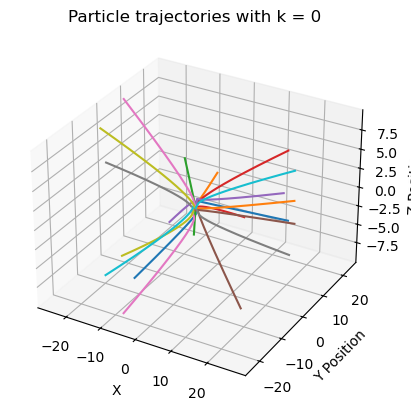

In [340]:
import random

list_of_initial_conditions = np.zeros((20, 6))

for i in range(20):
    for j in range(6):
        list_of_initial_conditions[i][j] = random.uniform(-1, 1)

list_of_x_vals = np.zeros((20, 10000 + 1))
list_of_y_vals = np.zeros((20, 10000 + 1))
list_of_z_vals = np.zeros((20, 10000 + 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(20):
    list_of_x_vals[i], list_of_y_vals[i], list_of_z_vals[i] = trajectory(list_of_initial_conditions[i], .001, 10000, 0)
    ax.plot3D(list_of_x_vals[i], list_of_y_vals[i], list_of_z_vals[i])

ax.set_xlabel("X")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title("Particle trajectories with k = 0")

In this graph we can see that the effect of $\kappa$ being 0 is that all of the particles go away from the line of charge because there is no magnetic force.

### * Particle Trajectories: $\kappa = 1$

<font color = blue>
    
Repeat the above exercise, this time with $\kappa = 1$.  **Discuss** the results.

Text(0.5, 0.92, 'Particle trajectories with k = 0')

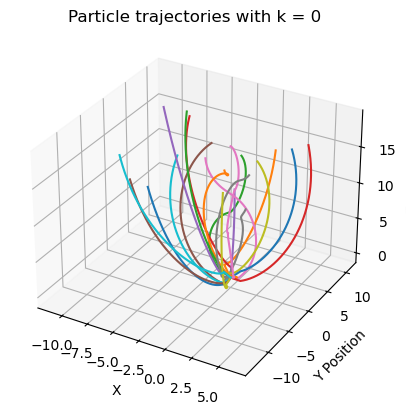

In [342]:
list_of_initial_conditions = np.zeros((20, 6))

for i in range(20):
    for j in range(6):
        list_of_initial_conditions[i][j] = random.uniform(-1, 1)

list_of_x_vals = np.zeros((20, 10000 + 1))
list_of_y_vals = np.zeros((20, 10000 + 1))
list_of_z_vals = np.zeros((20, 10000 + 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(20):
    list_of_x_vals[i], list_of_y_vals[i], list_of_z_vals[i] = trajectory(list_of_initial_conditions[i], .001, 10000, 1)
    ax.plot3D(list_of_x_vals[i], list_of_y_vals[i], list_of_z_vals[i])

ax.set_xlabel("X")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title("Particle trajectories with k = 1")

In this figure, we can see that the effect of the $\kappa$ being 1 is that the charge causes that particles to go up the z axis with the line of charge because now there is equal magnetic and electric charge.

### * Particle Trajectories: $\kappa = 20$

<font color = blue>
    
Finally, repeat the process with $\kappa = 20$.  (Note that without redoing the problem from the beginning and choosing a different non-dimensionalization, we cannot actually turn off the electric force.  Instead, we are turning up the magnetic force to the point where it should dominate the behavior.)  **Discuss** the results.

Text(0.5, 0.92, 'Particle trajectories with k = 0')

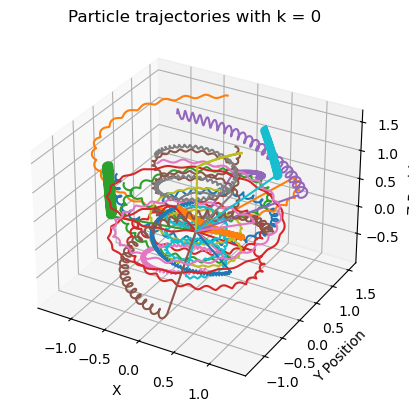

In [344]:
list_of_initial_conditions = np.zeros((20, 6))

for i in range(20):
    for j in range(6):
        list_of_initial_conditions[i][j] = random.uniform(-1, 1)

list_of_x_vals = np.zeros((20, 10000 + 1))
list_of_y_vals = np.zeros((20, 10000 + 1))
list_of_z_vals = np.zeros((20, 10000 + 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(20):
    list_of_x_vals[i], list_of_y_vals[i], list_of_z_vals[i] = trajectory(list_of_initial_conditions[i], .001, 10000, 20)
    ax.plot3D(list_of_x_vals[i], list_of_y_vals[i], list_of_z_vals[i])

ax.set_xlabel("X")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title("Particle trajectories with k = 20")

Lastly, in this figure, we can see that $\kappa$ = 20 causes the magnetic force to be much greater than the electric force causing the particles to act accordingly and go in circles around the line of charge.

## Final Project Proposal

<font color = blue>
    Due along with this week's notebook is your final project proposal (do this separate from the Python notebook, LATEX preferred.)  This proposal should be 2-3 pages and include:

```
```
    
1) A brief qualitative discussion of the problem you are interested in along with why it is interesting.

2) A more detailed mathematical discussion of the problem, establishing and explaining/deriving the essential equations, ready for computer analysis.  (This is where most of the work should be put in.)

3) An explanation of why the problem is appropriate for numerical analysis, and of what specific numerical technique(s) you plan to utilize.

4) A specific plan for what you intend to accomplish in the following WEEK.  (For example, "I plan to write the basic RK4 code for the system and confirm that it is working by using such-and-such test case")

5) Citations for external references/sources appropriate to the problem.  If you are talking to another professor about your project, please include that here -- you can look up a citation style for "unpublished discussions")